# Example notebook for generating masks with pyMOE 

In the following we exemplify how to generate masks using the generate module:
* Circular aperture (binary + save into image file) 
* Rectangular aperture  (binary + save into image file)
* Fresnel Zone Plate (binary + save into image file)
* Fresnel lens (with arbitrary number of layers) 
* Arbitrary phase function (with arbitrary number of layers) 
* Operations with/ within apertures (multiply, add, rotate, clip, ...)

Simple exporting to .gds file of the generated masks is also exemplified, using gdsconverter module.  

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 
from pyMOE.generate import *  

from scipy import ndimage

## Circular aperture 

<IPython.core.display.Javascript object>


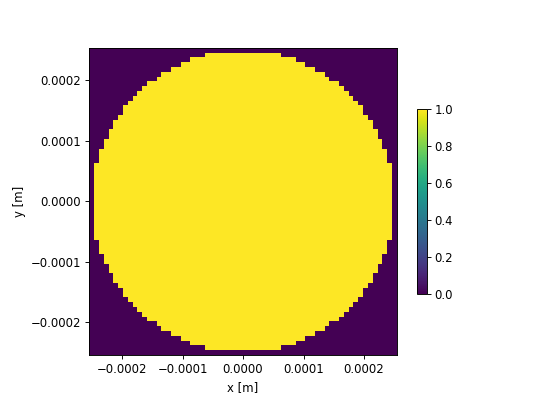

<IPython.core.display.Javascript object>


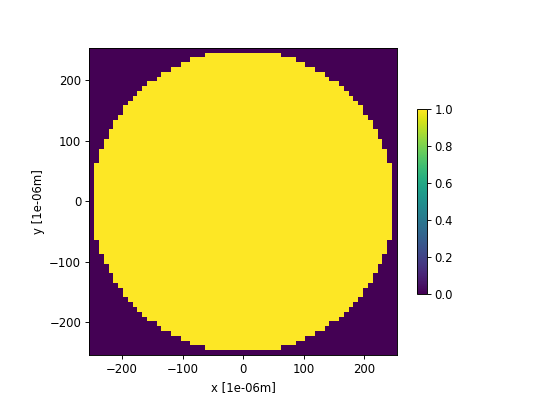

<IPython.core.display.Javascript object>


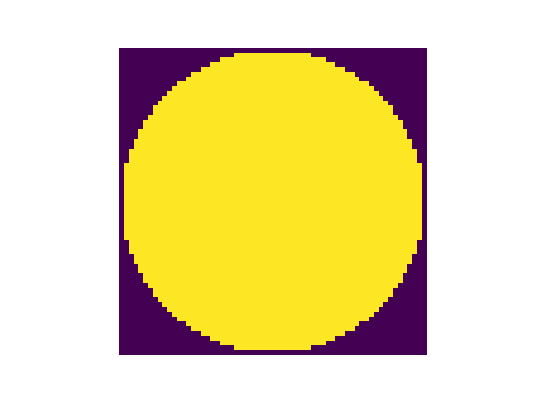

<IPython.core.display.Javascript object>


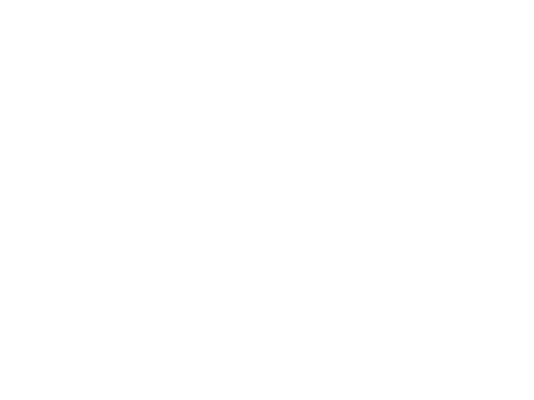

<IPython.core.display.Javascript object>


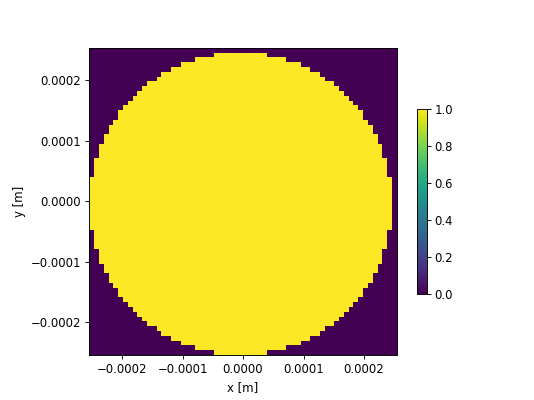

In [2]:
#make circular apertures (returns also the 2D array)
npix =64
xsiz =500
ysiz = 500

mask = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

# Create circular aperture on mask
center=(0, 0 ) 
mask = moe.generate.circular_aperture(mask, radius=0.5*xsiz*micro, center=center )

moe.plotting.plot_aperture(mask)
moe.plotting.plot_aperture(mask, scale=micro)

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)
moe.plotting.save_mask_plot(np.abs(mask.aperture-1), xsiz, ysiz, "circ.tiff")

center = (-xsiz/npix/2*micro, -ysiz/npix/2*micro) 
mask = moe.generate.circular_aperture(mask, radius=0.5*xsiz*micro, center=center )

moe.plotting.plot_aperture(mask)

<IPython.core.display.Javascript object>


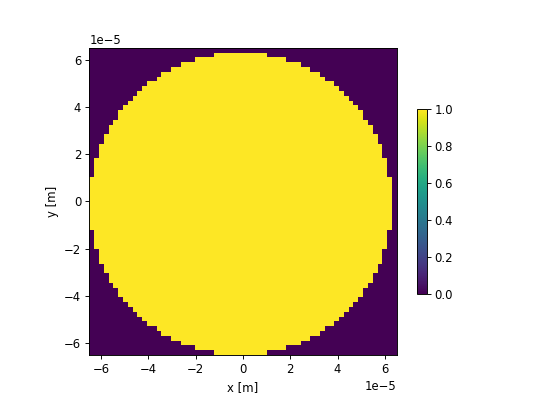

<IPython.core.display.Javascript object>


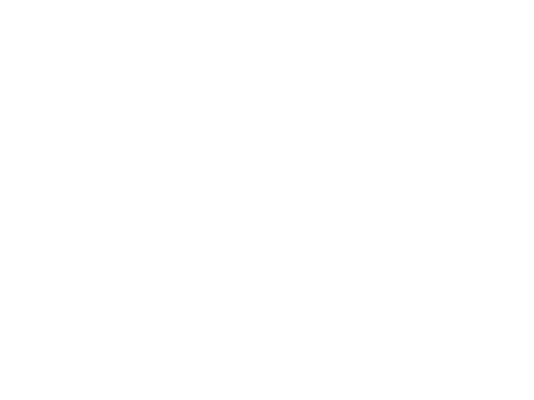

<IPython.core.display.Javascript object>


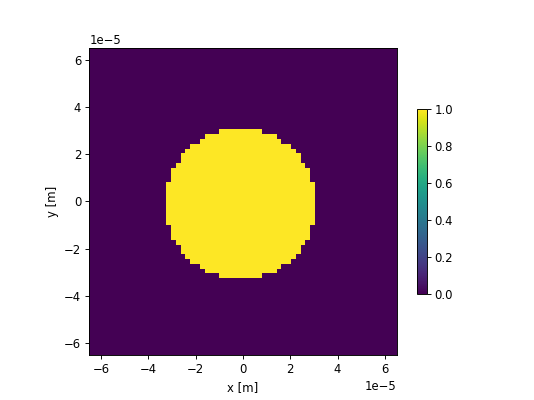

<IPython.core.display.Javascript object>


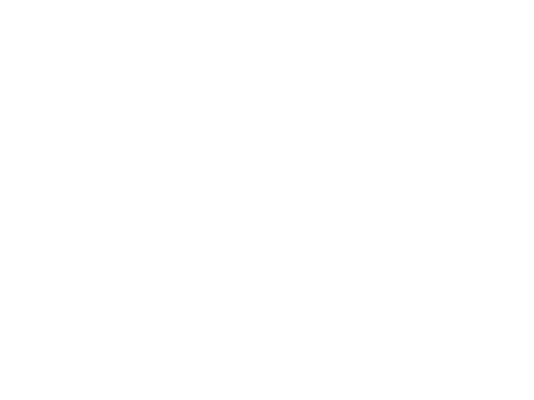

<IPython.core.display.Javascript object>


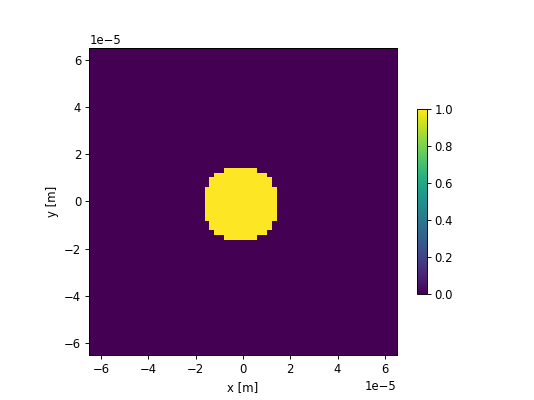

<IPython.core.display.Javascript object>


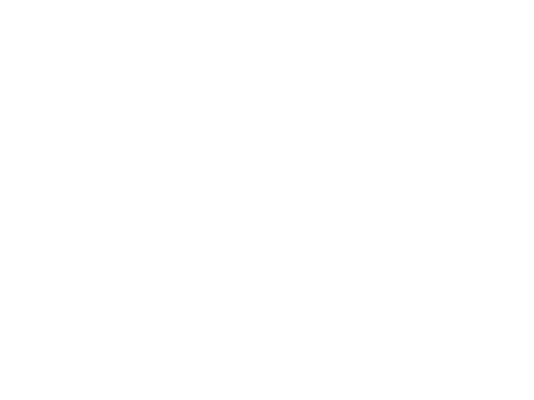

In [3]:
npix = 64
xsiz = 128
ysiz = 128

center = (-xsiz/npix/2*micro, -ysiz/npix/2*micro) 

aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper2 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper3 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

mask1 = moe.generate.circular_aperture(aper1, radius=0.5*xsiz*micro, center=center )
mask2 = moe.generate.circular_aperture(aper2, radius=0.25*xsiz*micro, center=center )
mask3 = moe.generate.circular_aperture(aper3, radius=0.125*xsiz*micro, center=center )

moe.plotting.plot_aperture(mask1)
moe.generate.save_mask_plot(np.abs(mask1.aperture-1), xsiz, ysiz, "circ1.jpg");

moe.plotting.plot_aperture(mask2)
moe.generate.save_mask_plot(np.abs(mask2.aperture-1), xsiz, ysiz, "circ2.png");

moe.plotting.plot_aperture(mask3)
moe.generate.save_mask_plot(np.abs(mask3.aperture-1), xsiz, ysiz, "circ3.bmp");

## Rectangular aperture 

<IPython.core.display.Javascript object>


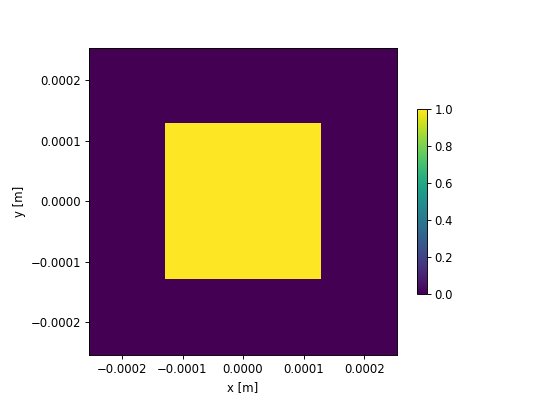

<IPython.core.display.Javascript object>


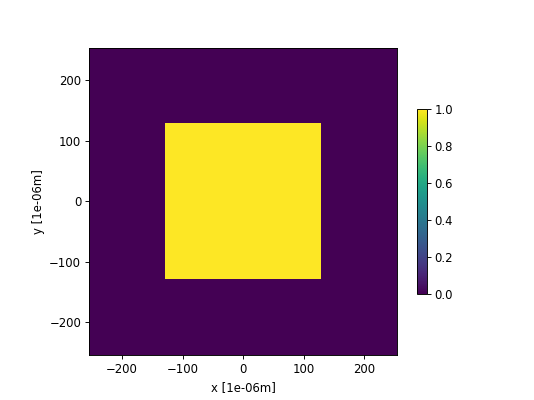

<IPython.core.display.Javascript object>


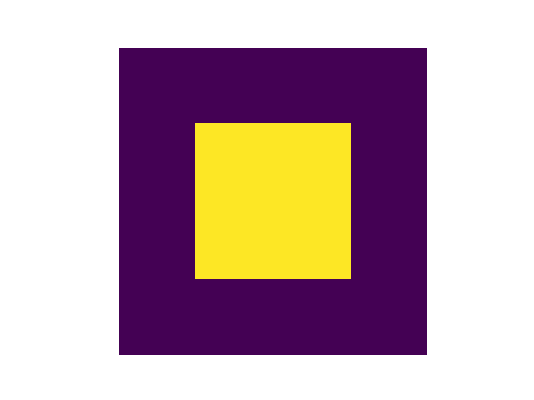

<IPython.core.display.Javascript object>


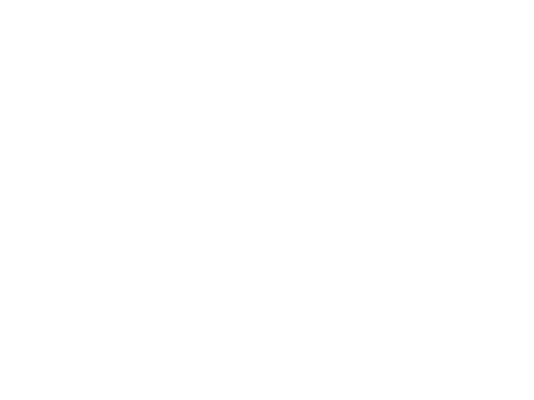

In [4]:
#make circular apertures (returns also the 2D array)
npix =64
xsiz = 500
ysiz = 500

mask = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix+1, -ysiz/2*micro, ysiz/2*micro, npix+1,)

# Create circular aperture on mask
center=(0, 0 ) 
partial = 0.5
mask = moe.generate.rectangular_aperture(mask, xsiz*micro*partial, ysiz*micro*partial,  center=center )

moe.plotting.plot_aperture(mask)
moe.plotting.plot_aperture(mask, scale=micro)

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)
moe.generate.save_mask_plot(np.abs(mask.aperture-1), xsiz, ysiz, "rect.tiff")



<IPython.core.display.Javascript object>


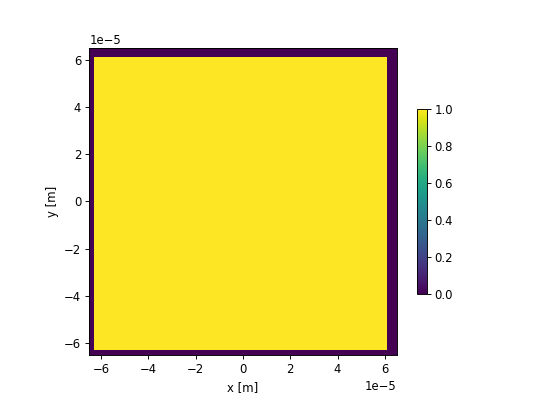

<IPython.core.display.Javascript object>


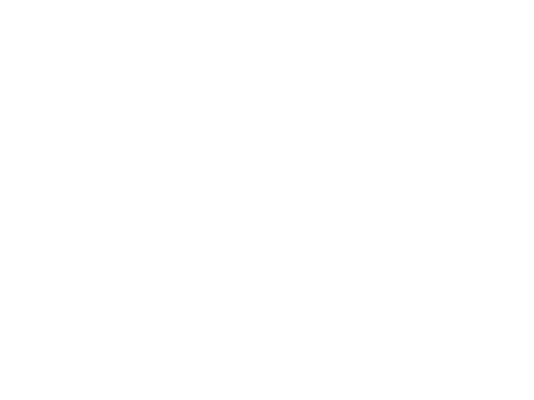

<IPython.core.display.Javascript object>


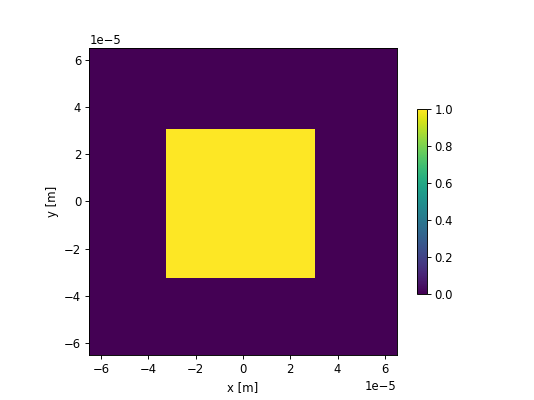

<IPython.core.display.Javascript object>


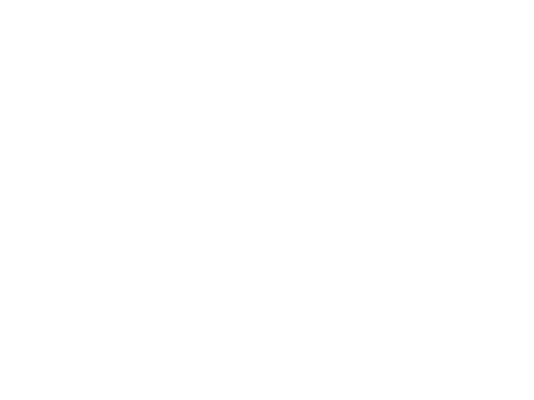

<IPython.core.display.Javascript object>


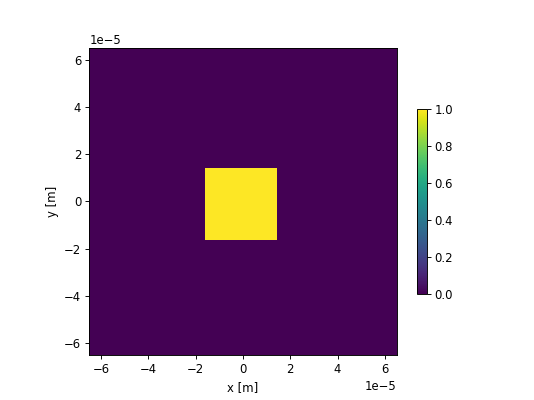

<IPython.core.display.Javascript object>


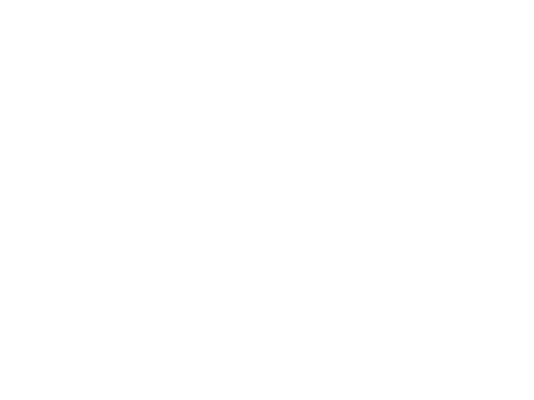

In [5]:
npix = 64
xsiz = 128
ysiz = 128

aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper2 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper3 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)


center = (-xsiz/npix/2*micro, -ysiz/npix/2*micro) 

partial = 0.98
mask1 = moe.generate.rectangular_aperture(aper1, xsiz*micro*partial, ysiz*micro*partial,  center=center )

partial = 0.5 
mask2 = moe.generate.rectangular_aperture(aper2, xsiz*micro*partial, ysiz*micro*partial,  center=center )

partial = 0.25 
mask3 = moe.generate.rectangular_aperture(aper3, xsiz*micro*partial, ysiz*micro*partial,  center=center )

moe.plotting.plot_aperture(mask1)
moe.generate.save_mask_plot(np.abs(mask1.aperture-1), xsiz, ysiz, "rect1.jpg");

moe.plotting.plot_aperture(mask2)
moe.generate.save_mask_plot(np.abs(mask2.aperture-1), xsiz, ysiz, "rect2.png");

moe.plotting.plot_aperture(mask3)
moe.generate.save_mask_plot(np.abs(mask3.aperture-1), xsiz, ysiz, "rect3.bmp");




<IPython.core.display.Javascript object>


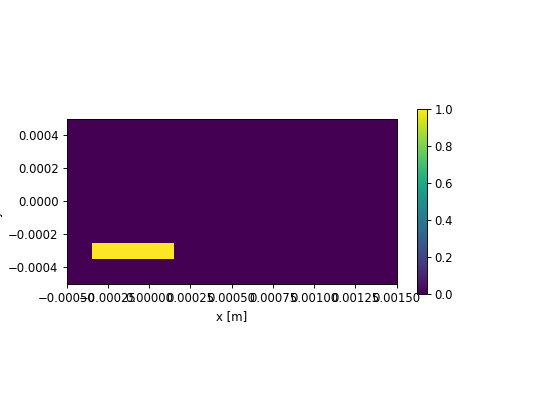

<IPython.core.display.Javascript object>


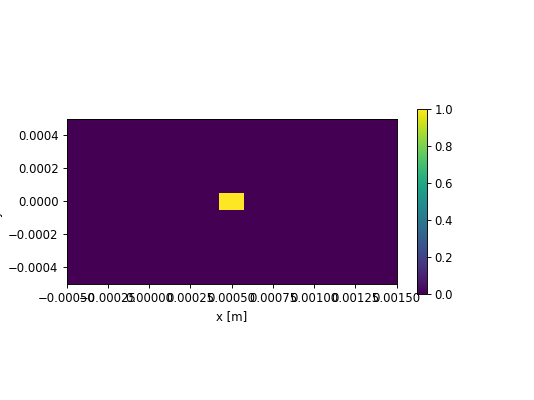

<IPython.core.display.Javascript object>


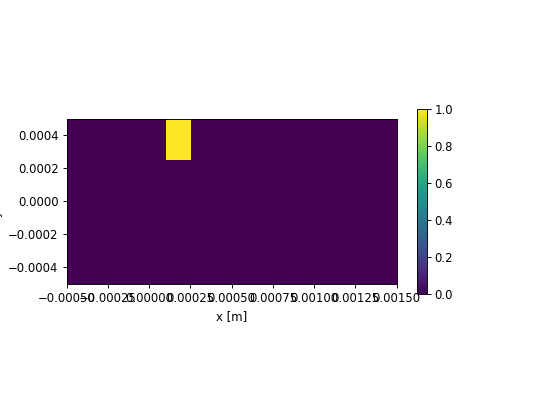

In [6]:
### Rectangular non-centered aperture 

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)

# create rectangular mask
rectangle = moe.generate.rectangular_aperture(mask, 500*micro, 100*micro, center=(-100*micro, -300*micro))
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, )
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 500*micro, corner=(100*micro, 250*micro))
moe.plotting.plot_aperture(rectangle, ) 

## Fresnel Zone Plate

<IPython.core.display.Javascript object>


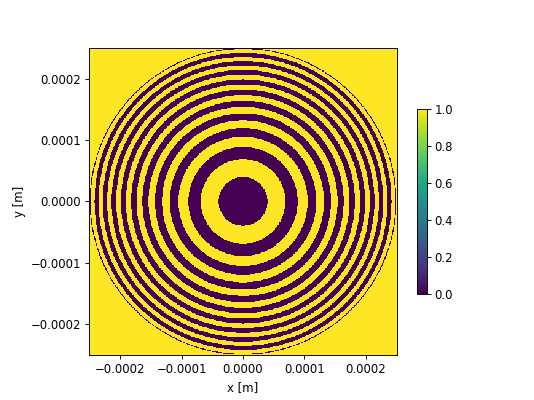

<IPython.core.display.Javascript object>


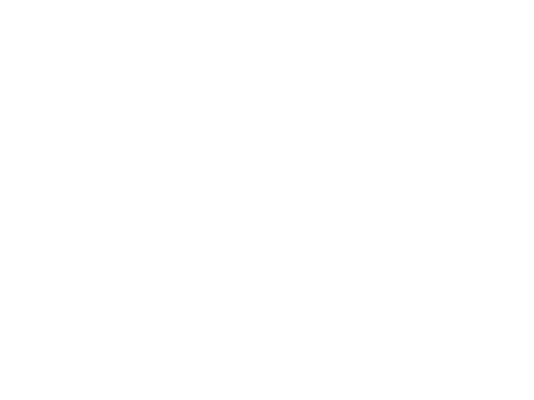

In [7]:
####generate a fresnel zone plate 

foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
npix = 500 # nr of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgfile = 'fresnel_zone_plate.tiff' # name of img file

center = (0,0)
aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
maskfzp = moe.generate.fresnel_zone_plate_aperture(aper1, foc * micro, lda * micro, radius=xsiz/2*micro, center = center)
moe.plotting.plot_aperture(maskfzp, )

moe.generate.save_mask_plot(maskfzp.aperture, xsiz, ysiz, imgfile);

<IPython.core.display.Javascript object>


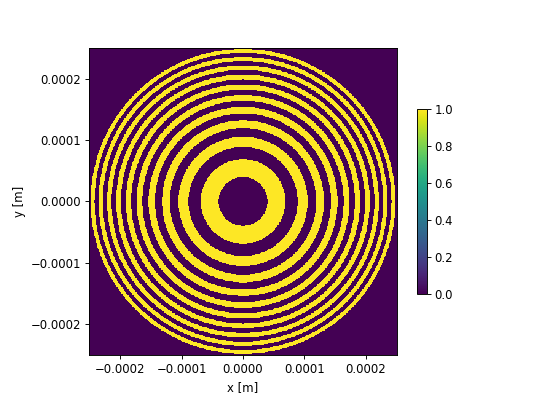

<IPython.core.display.Javascript object>


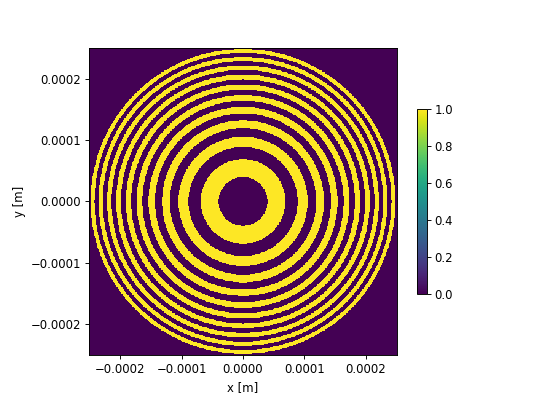

In [8]:
### The truncation operation can also be obtained from the truncate_aperture_radius function 

####generate a fresnel zone plate 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
npix = 500 # nr of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgfile = 'fresnel_zone_plate_truncate.tiff' # name of img file


aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)


maskfzp = moe.generate.fresnel_zone_plate_aperture(aper1, foc * micro, lda * micro,)
maskfzp_tr = moe.generate.truncate_aperture_radius(maskfzp, radius=xsiz/2*micro)

moe.plotting.plot_aperture(maskfzp_tr, )

###truncate an already truncated mask
maskfzp_tr = moe.generate.truncate_aperture_radius(maskfzp_tr, radius=xsiz/2*micro)

moe.plotting.plot_aperture(maskfzp_tr, )

###THIS GIVES THE NEGATIVE OF THE PREVIOUS ONE
#BECAUSE OF THE WAY THE FUNCTION fzp IS DEFINED, 
#it is made to have black (=1) on the border 
#So that the image file appears as black for 0 value of the field 
#therefore the inversion in the color 


In [9]:
#Export the image into a gds using the  export module 

infilxe = 'fresnel_zone_plate.tiff' # name of img file
outfilxe = 'fresnel_zone_plate.gds'
pixelx = 1 #um 
pixely = 1 #um 
cellname = 'TOP'

moe.export.grayim2gds(infilxe, outfilxe, pixelx, pixely, cellname, 0)

Exported the image file fresnel_zone_plate.tiff into fresnel_zone_plate.gds


## Fresnel phase mask

<IPython.core.display.Javascript object>


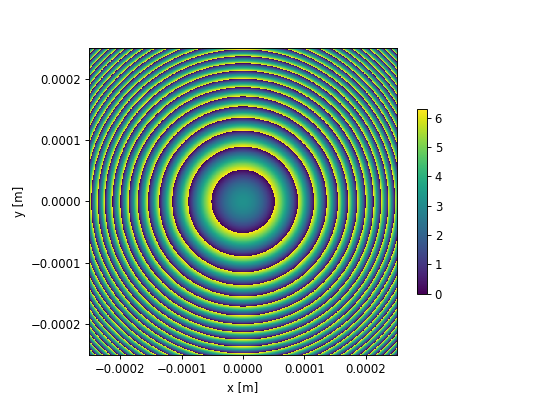

../..\pyMOE\plotting.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


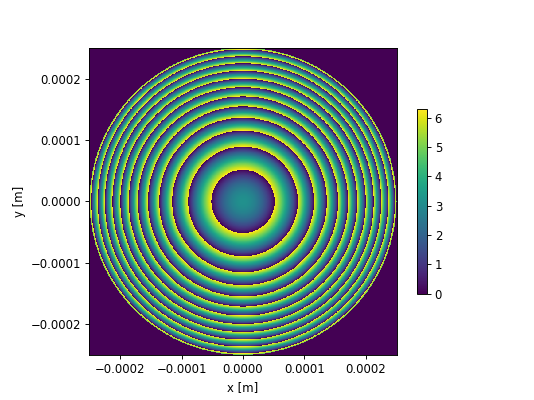

<IPython.core.display.Javascript object>


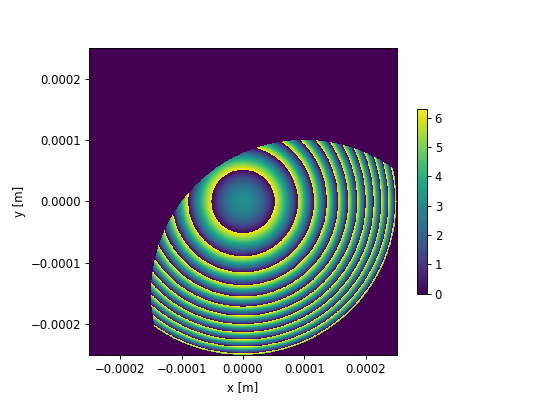

In [10]:
####generate a fresnel phase mask and save it into gds 
npix = 1001 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.532 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size
n = 10  # number of gray levels 
gdsname = 'fresnel_phase_mask.gds' # name of gds file


###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc * micro, lda * micro, )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc * micro, lda * micro, radius=xsiz/2*micro)
moe.plotting.plot_aperture(mask2, )


################
###Fresnel phase mask with a displaced center 
# Create empty mask
aperture3 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

#by default the takes the mask at the center = (0,0) 
aperture4 = moe.generate.fresnel_phase(aperture3, foc * micro, lda * micro, radius = xsiz/2*micro)

# and truncate around radius
center = (100*micro, -150*micro)
mask3 = moe.generate.truncate_aperture_radius(aperture4, xsiz/2*micro, center = center)
moe.plotting.plot_aperture(mask3, )



## Generate phase mask from arbitrary phase function 

<IPython.core.display.Javascript object>


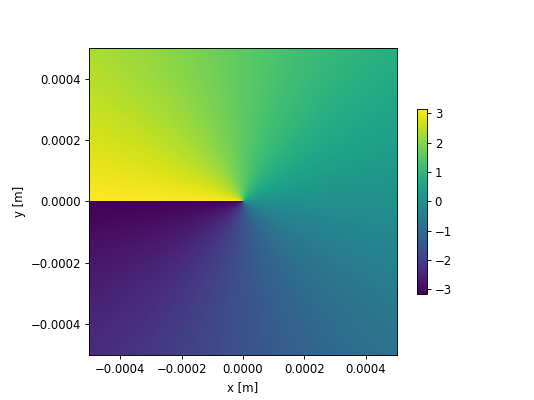

<IPython.core.display.Javascript object>


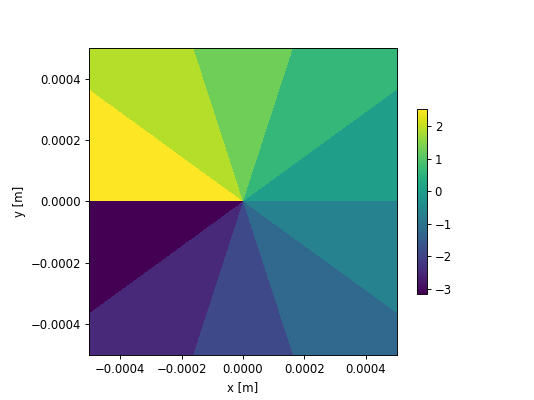

In [31]:
### Example with a spiral complex phase function 

#attention, make sure to have enough pixels 
npix = 2000  # number of pixels 
xsiz = 1000 #x-size 
ysiz = 1000 #y-size 
ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)
    
def spiral(x,y,x0,y0,L):
    """
    returns a spiral COMPLEX PHASE with input meshgrid (x,y) with center at (x0,y0)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center of the lens 
    y0 = y-coordinate of center of the lens
    L = topological charge 
    """

    theta = np.arctan2((y-y0),(x-x0))
    sp = np.exp(1.0j*L*theta)
    return sp
    

n =10 # number of gray levels 


center = (0, 0)

aperture = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=ltop)
moe.plotting.plot_aperture(mask)

mask.discretize(n)
moe.plotting.plot_aperture(mask) 


<IPython.core.display.Javascript object>


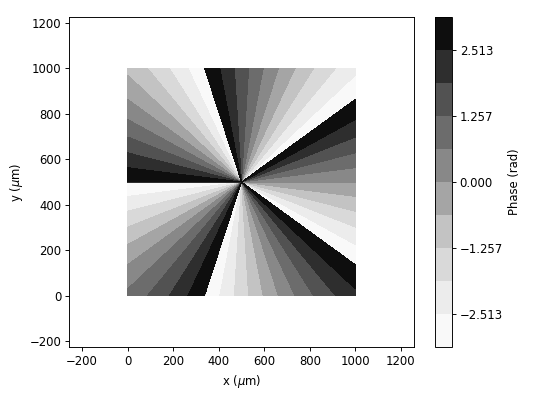

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file spiral_phase_plate5v0-0-1.gds


<IPython.core.display.Javascript object>


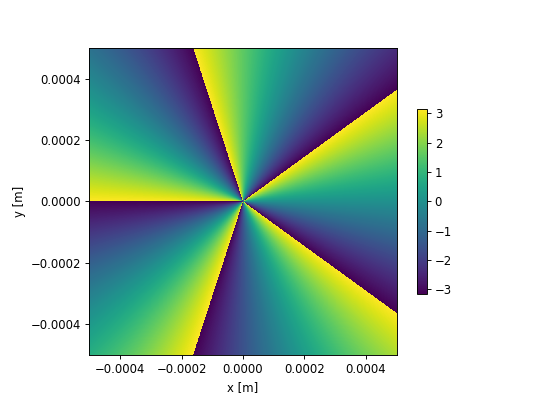

<IPython.core.display.Javascript object>


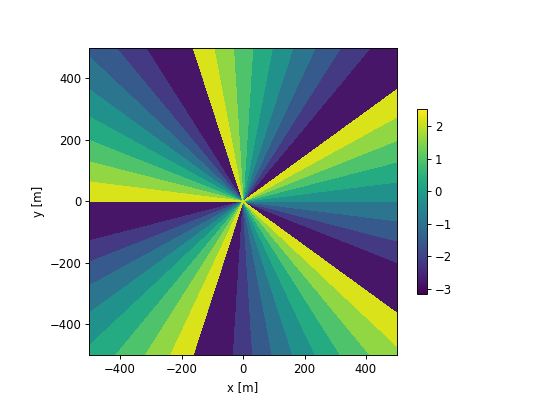

Mask has 4000000 number of points distributed in 10 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:55.619425
[Total time converting to GDS]
Elapsed: 0:00:56.809521
Saved spiral_phase_plate5_v1-0_raster.gds
Creating contours 
[Create Contours]
Elapsed: 0:00:00.860369
Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
[Total time converting to GDS]
Elapsed: 0:00:01.177392
Saved spiral_phase_plate5_v1-0_contour.gds


In [33]:
ltop = 5

##Here we use v0.0.1 just for comparison 
moe.generate.arbitrary_phase_mask('gdspy', npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename='spiral_phase_plate'+str(ltop)+'v0-0-1.gds', plotting=True ,prec = 1e-12, mpoints = 1e9)

##Here we use the v1.0 
##Compare the function with topological number equals to 5 
aperture = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=5)
moe.plotting.plot_aperture(mask) 

mask.discretize(n)
moe.plotting.plot_aperture(mask) 


gdsfile = 'spiral_phase_plate'+str(ltop)+'_v1-0_raster.gds'  #name of gds file 

###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
layout = gdsmask.create_layout(mode="raster")
gdsmask.write_gds(gdsfile)


gdsfile = 'spiral_phase_plate'+str(ltop)+'_v1-0_contour.gds'  #name of gds file 

###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(mask, precision=1e-12)

# Create layout and merge polygons together
layout = gdsmask.create_layout(mode="contour")
gdsmask.write_gds(gdsfile)




In [13]:
### Example with a function defined on the go
#Using v1.0 functions 

npix = 1000  # number of pixels 
xsiz = 100 #x-size 
ysiz = 100 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a blazed grating  
def fexample(x,y,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    
    sfunc = (- a * (x + y)*1e6  -b) 
    func = np.exp(1.0j*sfunc)
    #func = np.imag(func)
    func = np.angle(func)
    return func

aval = 1
bval = 1
n = 5 # number of gray levels 

aperture = moe.generate.create_empty_aperture(-xsiz/2 * micro, xsiz/2 * micro, npix, -ysiz/2 * micro, ysiz/2 *micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, fexample,a =aval , b = bval,  center=center)
moe.plotting.plot_aperture(mask) 

mask.discretize(n)
moe.plotting.plot_aperture(mask)


###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsfile = "blazed_grating.gds"   #name of gds file 
gdsmask.write_gds(gdsfile)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mask has 1000000 number of points distributed in 5 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:12.212321
Merging layer 0 of 4 with 200241 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:45.177509
Merging layer 1 of 4 with 199610 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:44.984334
Merging layer 2 of 4 with 200573 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:45.515755
Merging layer 3 of 4 with 199626 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:46.653671
Merging layer 4 of 4 with 199950 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:47.277488
[Total time converting to GDS]
Elapsed: 0:04:01.824066
Saved blazed_grating.gds


<IPython.core.display.Javascript object>


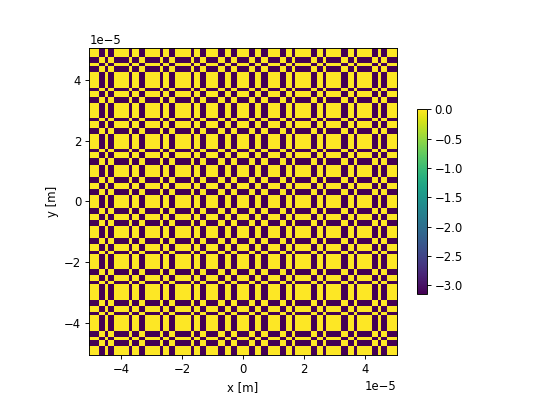

Mask has 10000 number of points distributed in 2 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:00.212009
Merging layer 0 of 1 with 4488 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:01.560132
Merging layer 1 of 1 with 5512 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:01.629462
[Total time converting to GDS]
Elapsed: 0:00:03.402605
Saved Dammann_2D.gds


In [14]:
## Generate a Dammann Grating 
aperture_width = 100*micro
aperture_height = 100*micro
x_pixel = 100
y_pixel = 100

aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)

transitions_x = [0.242, 0.414]
transitions_y = [0.242, 0.414]


period_x = period_y = 10*micro

mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.dammann_2d, transitions_x=transitions_x, period_x=period_x, transitions_y=transitions_y, period_y=period_y)

mask.aperture = mask.aperture*np.pi

mask.discretize(2)
moe.plotting.plot_aperture(mask)


###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsfile = "Dammann_2D.gds"   #name of gds file 
gdsmask.write_gds(gdsfile)


<IPython.core.display.Javascript object>


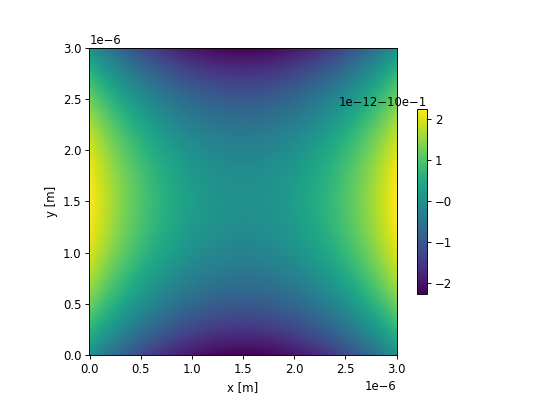

<IPython.core.display.Javascript object>


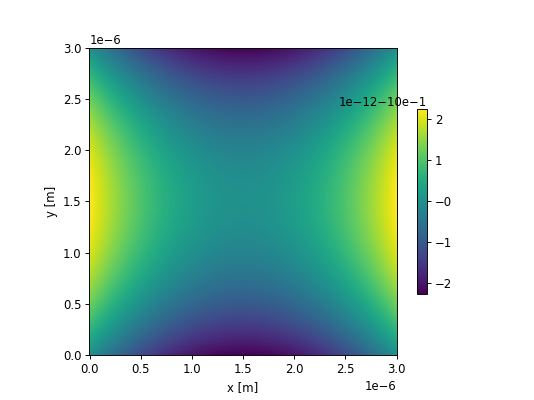

<IPython.core.display.Javascript object>


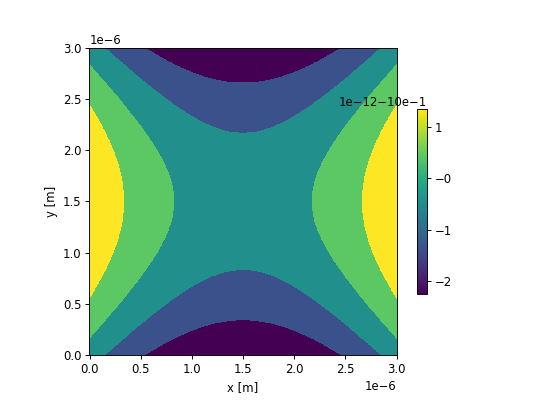

Mask has 1002001 number of points distributed in 5 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:14.657347
Merging layer 0 of 4 with 93202 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:34.741816
Merging layer 1 of 4 with 210500 polygons:
Progress: [####################] 100.0%
Elapsed: 0:02:41.313059
Merging layer 2 of 4 with 394525 polygons:
Progress: [####################] 100.0%
Elapsed: 0:04:53.852749
Merging layer 3 of 4 with 210552 polygons:
Progress: [####################] 100.0%
Elapsed: 0:01:14.952163
Merging layer 4 of 4 with 93222 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:25.834498
[Total time converting to GDS]
Elapsed: 0:10:05.356637
Saved saddle.gds


In [15]:
### Another example with a function defined on the go

npix = 1000  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 


##just defined saddle function   (same as in the sag functions modules)
def funct(x,y,a,b):
    """
    returns a COMPLEX PHASE saddle function 
    Args:
        x = x array from meshgrid 
        y = y array from meshgrid 
        a = arbitrary parameter
        b  = arbitrary parameter 
    """

    sfunc =  (a * ((x*x - y*y)) -b) 
    func = np.exp(1.0j*sfunc)
    func = np.angle(func)

    return func

aval = 1
bval = 1

center = (1.5e-6, 1.5e-6)

n = 5 # number of gray levels 

###make the saddle with the  just defined function 

aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix, 0, ysiz *micro, npix,)

aperture =  moe.generate.arbitrary_aperture_function(aperture, funct, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(aperture)


###make the  saddle with the same with the saddle function 

aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix+1, 0, ysiz *micro, npix+1,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.saddle, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(mask)

mask.discretize(n)
moe.plotting.plot_aperture(mask)


###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsfile = "saddle.gds"   #name of gds file 
gdsmask.write_gds(gdsfile)

<IPython.core.display.Javascript object>


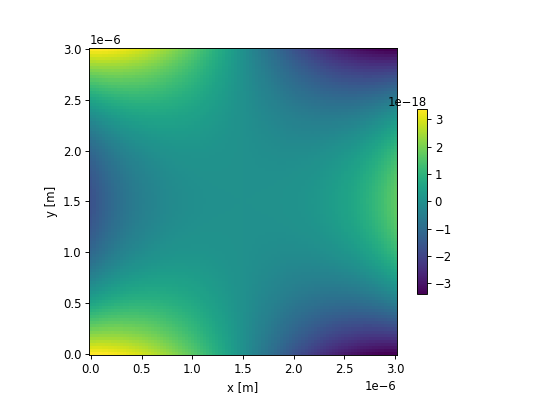

<IPython.core.display.Javascript object>


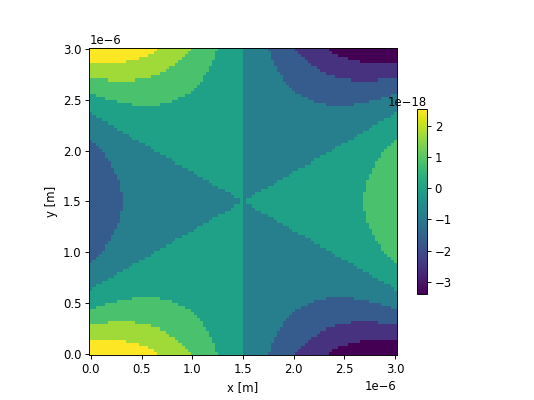

<IPython.core.display.Javascript object>


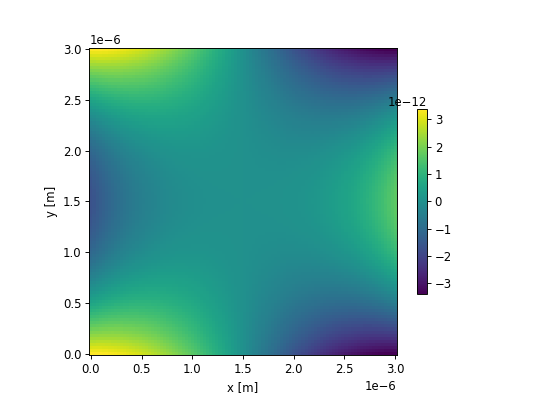

<IPython.core.display.Javascript object>

Mask has 10000 number of points distributed in 8 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:00.150013
Merging layer 0 of 7 with 180 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00.009000
Merging layer 1 of 7 with 392 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00.031006
Merging layer 2 of 7 with 1028 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00.170010
Merging layer 3 of 7 with 3400 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00.642761
Merging layer 4 of 7 with 3400 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00.665050
Merging layer 5 of 7 with 1028 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00.177015
Merging layer 6 of 7 with 392 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00.035005
Merging layer 7 of 7 with 180 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:0

In [16]:
### Another example with a function defined on the go, version 1.0 

npix = 100  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 

def fmsaddle(x,y,a,b):
    """
    returns a COMPLEX PHASE monkey saddle function 
    Args:
        x = x array from meshgrid 
        y = y array from meshgrid 
        a = arbitrary parameter
        b  = arbitrary parameter 
    """
    
    sfunc =  (a * ((x*x*x- 3*x*y*y)) -b) 
    func = np.exp(1.0j*sfunc)
    func = np.angle(func)

    return func

aval = 0.5
bval = 0
xo = 1.5
yo = 1.5
n = 8 # number of gray levels 

center = (xo*1e-6, yo*1e-6)


###make the saddle with the  just defined function 

###make the  saddle with the saddle function defined in fexample2
aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix, 0, ysiz *micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, fmsaddle, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(mask)

mask.discretize(n)
moe.plotting.plot_aperture(mask)


###make the monkey saddle from the function defined in the sag functions 
aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix, 0, ysiz *micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.monkey_saddle, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(mask)

mask.discretize(n)
moe.plotting.plot_aperture(mask)


###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsfile = "arbitrary_function_msaddle.gds"  #name of gds file 
gdsmask.write_gds(gdsfile)


## Compatibility workaround for functions from version v0.0.1  in with v1.x syntax/framework

Allows to use exactly same functions from v0.0.1 with v1.x functions

In [17]:
### phase vals on the mask 

def lensfres(x,y,x0,y0,fo,lda): 
    """
    returns the COMPLEX PHASE of a fresnel lens ith input meshgrid (x,y) with center at (x0,y0)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = coordinate of center of the lens 
    y0 = coordinate of center of the lens
    fo = focal distance 
    lda = wavelength 
    
    Note: for angle (in rad), call numpy.angle(...)
    """

    rc = np.sqrt((x-x0)**2 + (y-y0)**2)
    fresn = np.exp(1.0j*(fo-np.sqrt(fo**2 + rc**2))*(2*np.pi)/(lda))
    return fresn 
    

#Select exact position of contours  in phase
phas_vals = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]

vphase = moe.generate.arbitrary_phase_mask('gdspy',500, 500,500, len(phas_vals),\
           lensfres, fo=5000, lda=0.6328, \
           filename="phase-comparison.gds", plotting=True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )

############################################################
##defining a function with the previously defined contours that will be used to populate an aperture object 

def vals(x,y): 
    vals = moe.generate.arbitrary_phase_mask('gdspy',500, 500,500, len(phas_vals) -1,\
           lensfres, fo=5000, lda=0.6328, \
           filename=None, plotting = True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )
    return vals 


#Demonstrate compatibility between the two frameworks 

aperturex = moe.generate.create_empty_aperture(-250*micro, 250*micro, 500, -250*micro, 250*micro, 500,)
maskx =  moe.generate.arbitrary_aperture_function(aperturex,vals , center=center)

#n = len(phas_vals) -1

maskx.discretize(np.array( phas_vals)[0:4] ) 
moe.plotting.plot_aperture(maskx)

###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(maskx)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsmask.write_gds("fresnel_mask.gds")



<IPython.core.display.Javascript object>

Passing contours into GDS. 
0
1
2
3
Saved the phase profile with 5 layers into the file phase-comparison.gds


<IPython.core.display.Javascript object>

Passing contours into GDS. 
0
1
2
3


<IPython.core.display.Javascript object>

Mask has 250000 number of points distributed in 4 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:03.084512
Merging layer 0 of 3 with 62816 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:19.288598
Merging layer 1 of 3 with 64272 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:19.188660
Merging layer 2 of 3 with 60752 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:18.092013
Merging layer 3 of 3 with 62160 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:18.791423
[Total time converting to GDS]
Elapsed: 0:01:18.446207
Saved fresnel_mask.gds


## Generate Alvarez Lenses

In [18]:
# Creates an Alvarez lens pair masks
aperture_width = 1000*micro
aperture_height = 500*micro
x_pixel = 1000
y_pixel = 500


# focal range of the Alvarez lenses
f1 = 500*micro
f2 = 15000*micro
tuning_distance = 100*micro
wavelength = 1550*nano


# First lens
aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)
lens1 =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.Alvarez_phase, f1=f1, f2=f2, tuning_distance=tuning_distance, wavelength=wavelength)


# Second lens which is the same but flipped.
aperture2 = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)

lens2 =  moe.generate.arbitrary_aperture_function(aperture2, moe.sag.Alvarez_phase, f1=f1, f2=f2, tuning_distance=tuning_distance, wavelength=wavelength)
lens2.aperture = np.fliplr(lens2.aperture)


# initializes an aperture to store the result
result = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)



# displace aperture equally both ways, total displacement is twice displacement
displacement = 50*micro
rollidx = int(np.round(displacement/lens1.pixel_x,))

roll = rollidx
lens1.aperture = np.roll(lens1.aperture, -roll, axis=1)
lens2.aperture = np.roll(lens2.aperture, roll, axis=1)

lens1.aperture[:,-roll:] = 0
lens2.aperture[:,:roll] = 0



# Truncating the phase mask at multiples of 2π
lens1.modulos(2*np.pi)
lens2.modulos(2*np.pi)

n = 20 # number of discrete levels 

lens1.discretize(n)
lens2.discretize(n)


# Calculates the resulting aperutre by the sum of both displaced lens1 and lens2
result.aperture = lens1.aperture + lens2.aperture
result.modulos(2*np.pi)

moe.plotting.plot_aperture(lens1) 
moe.plotting.plot_aperture(lens2) 
moe.plotting.plot_aperture(result)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
###########################################################
#######Export the mask 
# Create GDSMask
gdslens1 = moe.GDSMask(lens1)
gdslens2 = moe.GDSMask(lens2)

# Create layout and merge polygons together
gdslens1.create_layout(merge=True)
gdslens1.write_gds("Alvarez_lens1.gds")

gdslens2.create_layout(merge=True)
gdslens2.write_gds("Alvarez_lens2.gds")


Mask has 500000 number of points distributed in 20 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:07.415004
Merging layer 0 of 19 with 50118 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:17.044215
Merging layer 1 of 19 with 24172 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:08.217076
Merging layer 2 of 19 with 23518 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:08.004612
Merging layer 3 of 19 with 24248 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:08.206007
Merging layer 4 of 19 with 23376 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:08.541652
Merging layer 5 of 19 with 23260 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:09.064687
Merging layer 6 of 19 with 23616 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:12.558986
Merging layer 7 of 19 with 23052 polygons:
Progress: [####################] 

## Operations between masks  

<IPython.core.display.Javascript object>


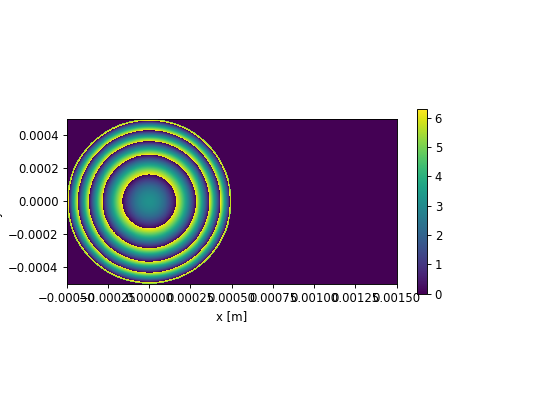

<IPython.core.display.Javascript object>


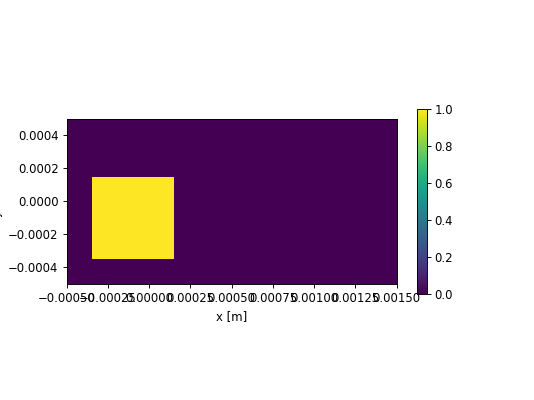

<IPython.core.display.Javascript object>


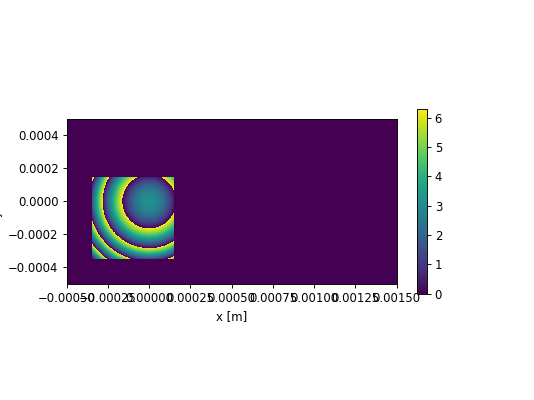

In [20]:
##Multiply two masks to obtain a composite mask 

aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1)

# Create empty mask
rectangle_mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
rectangle_mask = moe.generate.rectangular_aperture(rectangle_mask, 500*micro, 500*micro, center=(-100*micro, -100*micro))
moe.plotting.plot_aperture(rectangle_mask)

#multiply both masks 
aperture3 = moe.generate.aperture_multiply(aperture1, rectangle_mask)
moe.plotting.plot_aperture(aperture3, )


<IPython.core.display.Javascript object>


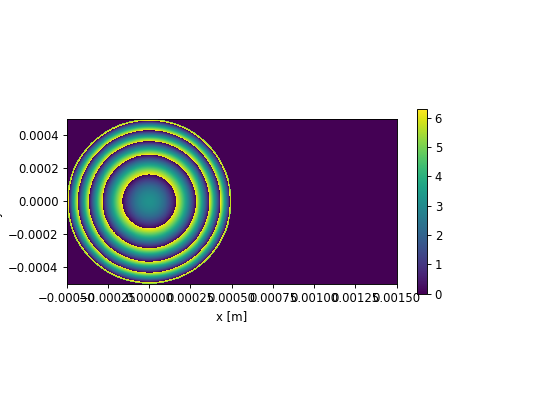

<IPython.core.display.Javascript object>


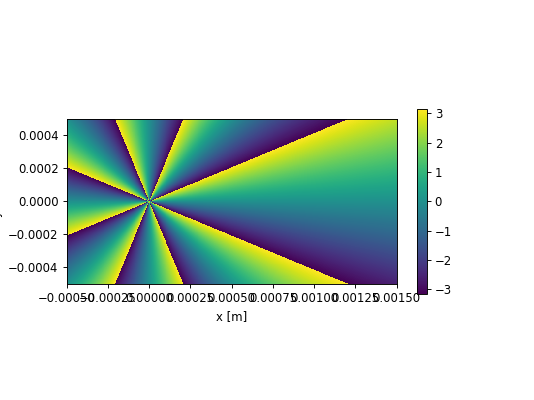

<IPython.core.display.Javascript object>


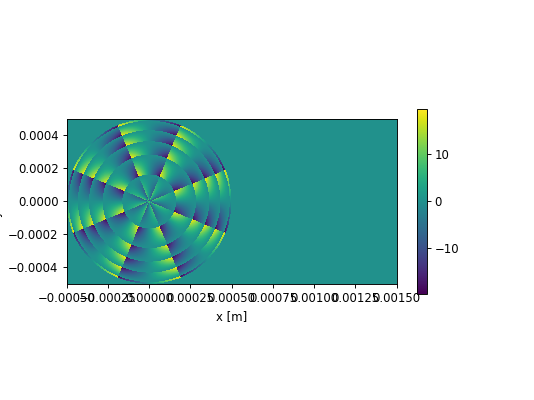

<IPython.core.display.Javascript object>


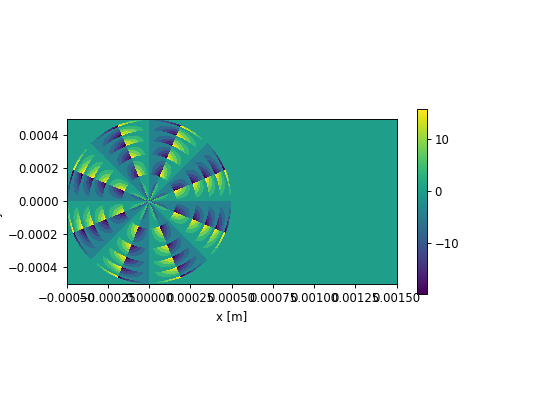

In [21]:
aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1)

center=(0,0)
n=10

aperture2 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture2 =  moe.generate.arbitrary_aperture_function(aperture2, moe.sag.spiral, center=center, L=8)

moe.plotting.plot_aperture(aperture2)

# Operation of both apertures
aperture3 = moe.generate.aperture_operation(aperture1, aperture2, np.multiply)
moe.plotting.plot_aperture(aperture3)

aperture3.discretize(n)
moe.plotting.plot_aperture(aperture3)

In [22]:
###EXTRA 

#Using gdsconverter module to save the result

# Create GDSMask
gdsmask = moe.GDSMask(aperture3)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsmask.write_gds("operation.gds")

Mask has 1002001 number of points distributed in 10 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:43.735947
Merging layer 0 of 9 with 4676 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:03.094841
Merging layer 1 of 9 with 14044 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:08.933600
Merging layer 2 of 9 with 25754 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:18.207357
Merging layer 3 of 9 with 47150 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:35.727648
Merging layer 4 of 9 with 103786 polygons:
Progress: [####################] 100.0%
Elapsed: 0:01:18.245442
Merging layer 5 of 9 with 714967 polygons:
Progress: [####################] 100.0%
Elapsed: 0:07:15.264405
Merging layer 6 of 9 with 47150 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:13.411282
Merging layer 7 of 9 with 25754 polygons:
Progress: [####################] 100.0%

<IPython.core.display.Javascript object>


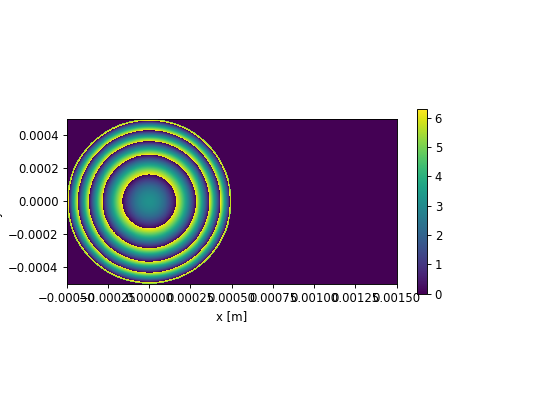

<IPython.core.display.Javascript object>


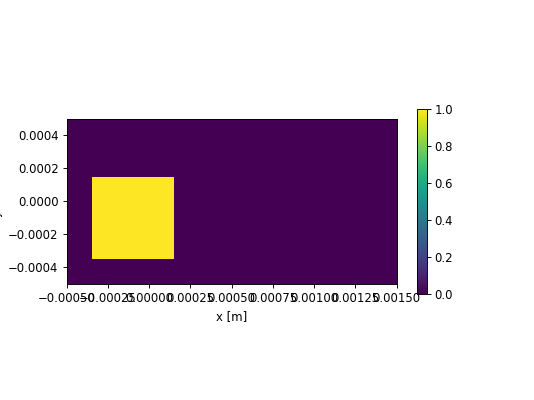

<IPython.core.display.Javascript object>


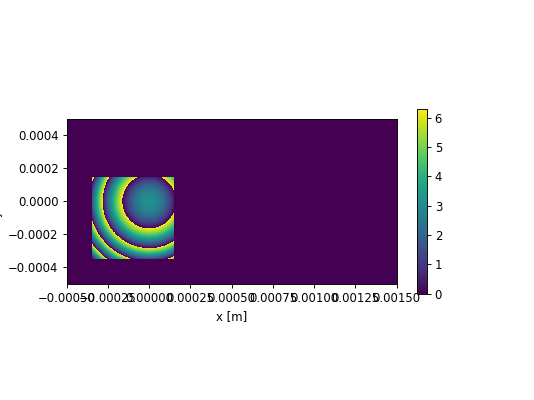

<IPython.core.display.Javascript object>


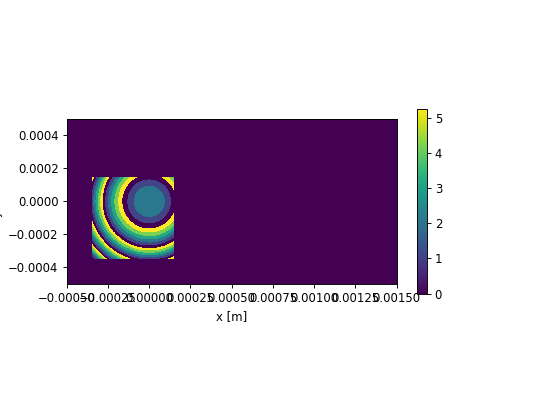

In [23]:
aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1, )

# Create empty mask
rectangle_mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
rectangle_mask = moe.generate.rectangular_aperture(rectangle_mask, 500*micro, 500*micro, center=(-100*micro, -100*micro))
moe.plotting.plot_aperture(rectangle_mask, )


aperture3 = moe.generate.aperture_multiply(aperture1, rectangle_mask)
moe.plotting.plot_aperture(aperture3, )

n = 6
aperture3.discretize(n ) 
moe.plotting.plot_aperture(aperture3)


<IPython.core.display.Javascript object>


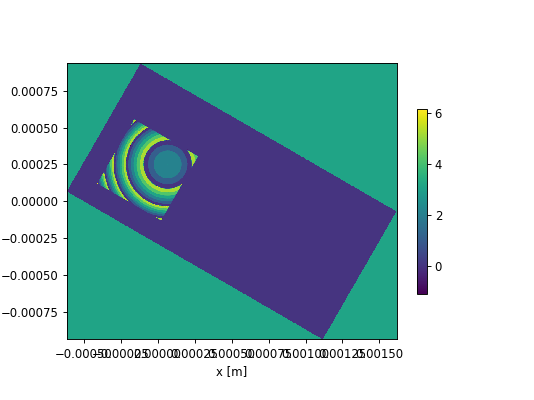

<IPython.core.display.Javascript object>


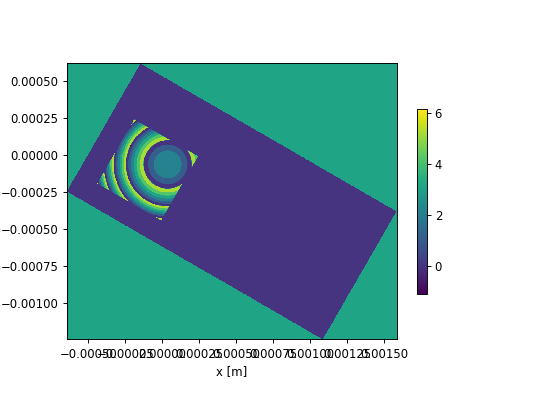

<IPython.core.display.Javascript object>


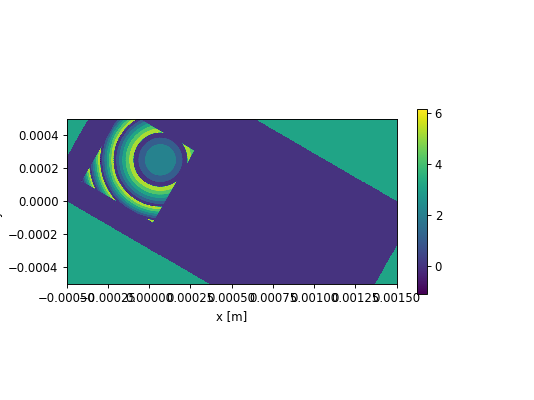

In [24]:
#rotation of aperture using ndimage rotation (pixel based -> an interpolation is made)

##without center of rotation
rotated_mask = moe.generate.aperture_rotate(aperture3, 30, background=np.pi)
moe.plotting.plot_aperture(rotated_mask, )


##with center of rotation
rotated_mask2 = moe.generate.aperture_rotate(aperture3, 30, pivot=(-100*micro, -100*micro), background=np.pi)#  pivot=(-100*micro, -100*micro))
#print(np.array(rotated_mask.aperture) )
moe.plotting.plot_aperture(rotated_mask2, )
#plt.axis("equal")

rotated_mask_clipped = moe.generate.clip_aperture(rotated_mask,-500*micro, 1500*micro, -500*micro, 500*micro )
moe.plotting.plot_aperture(rotated_mask_clipped, )

<IPython.core.display.Javascript object>


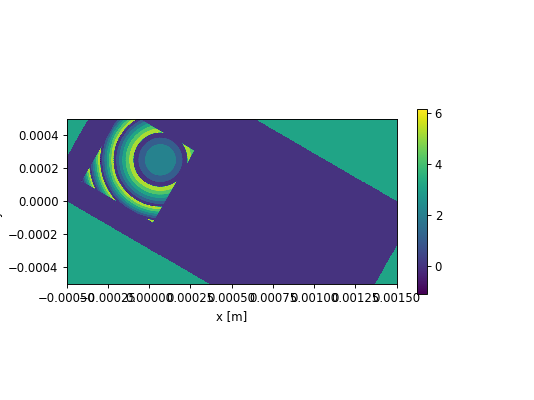

In [25]:

rotated_mask_clipped = moe.generate.clip_aperture(rotated_mask,-500*micro, 1500*micro, -500*micro, 500*micro )
moe.plotting.plot_aperture(rotated_mask_clipped, )

<IPython.core.display.Javascript object>


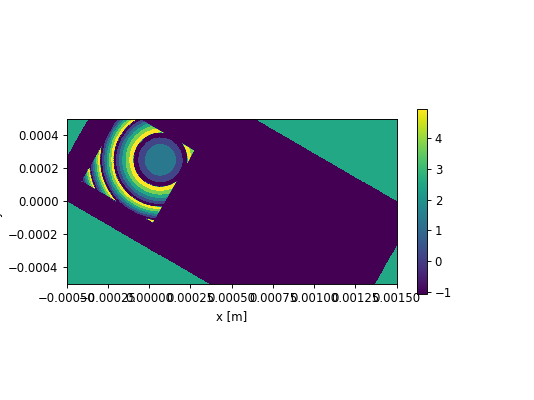

Mask has 497502 number of points distributed in 6 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:08.788249
Merging layer 0 of 5 with 330171 polygons:
Progress: [####################] 100.0%
Elapsed: 0:01:49.009596
Merging layer 1 of 5 with 14345 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:04.504091
Merging layer 2 of 5 with 14124 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:04.271863
Merging layer 3 of 5 with 122714 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:37.994357
Merging layer 4 of 5 with 8219 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:02.695229
Merging layer 5 of 5 with 7929 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:02.113540
[Total time converting to GDS]
Elapsed: 0:02:49.377926
Saved clipped_rotated_mask.gds


In [26]:
###Export 

#first discretize to ensure the level correspondence of the levels in the rotated and clipped mask 
rotated_mask_clipped.discretize(n ) 
moe.plotting.plot_aperture(rotated_mask_clipped)


gdsname = "clipped_rotated_mask.gds"
# Create GDSMask
gdsmask = moe.GDSMask(rotated_mask_clipped)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsmask.write_gds(gdsname)

<IPython.core.display.Javascript object>


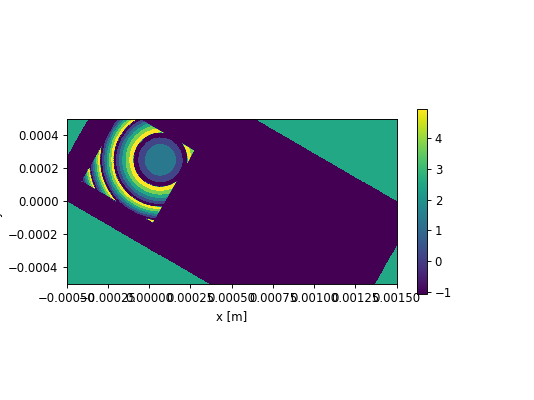

In [27]:
rotated_mask_clipped2 = moe.generate.clip_aperture_within(rotated_mask,-500*micro, 1500*micro, -500*micro, 500*micro )
moe.plotting.plot_aperture(rotated_mask_clipped, )


#### Due to pixel based rotation (using scipy ndimage) some pixels in the borders can have mixed levels (even with interpolation order =5). Therefore, if a precise rotation is sought, it is better to first export the unrotated layout and then perform the rotation directly on the layout, see for example notebok GDS_Operations and function rotate_layout on the gds_klops module.

## Extra: Zernike polynomials mask

In [28]:
#Zernike polynomial from https://github.com/jacopoantonello/zernike 

from zernike import RZern
import numpy as np 

def makezernike(x,y,L,K, num):
    """
    Adapting code from https://github.com/jacopoantonello/zernike to 
    return a COMPLEX PHASE with Zernike polynomial shape of Noll index num 
    Args:
        x = x array from meshgrid 
        y = y array from meshgrid 
        L = number of pixels on x
        K = number of pixels on y 
        num = Noll index of the Zernike polynomial 
            (see https://en.wikipedia.org/wiki/Zernike_polynomials#Noll's_sequential_indices )
    """

    cart = RZern(num)

    #the way the function works is a bit special 
    #because it is between -1 and 1 with a number 
    ddx = np.linspace(-1.0, 1.0, K)
    ddy = np.linspace(-1.0, 1.0, L)
    xv, yv = np.meshgrid(ddx, ddy)
    cart.make_cart_grid(xv, yv)

    c = np.zeros(cart.nk)
  
    for i in range(num, num+1):
        #plt.subplot(1, 1,1)
        c *= 0.0
        c[i] = 1.0
        Phik = cart.eval_grid(c, matrix=True)
        
        ephik = np.exp( Phik*1.0j*0.55 ) 
        #AD-HOC * 0.55 factor!! TO BE CORRECTED 
        
        mphi = np.angle(ephik )  
        mphi = np.nan_to_num(mphi, copy=True, nan=0.0, posinf=None, neginf=None)
        return mphi 

<IPython.core.display.Javascript object>


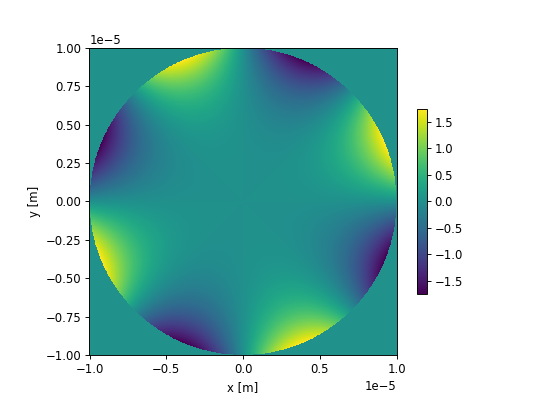

<IPython.core.display.Javascript object>


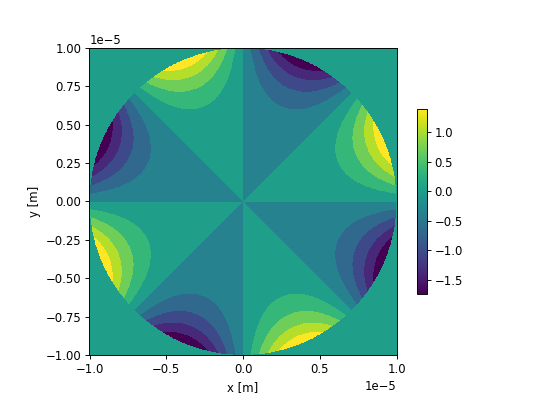

In [29]:
###Calculating and exporting a Zernike polynomial function 

npix = 1000  # number of pixels 
xsiz = 10 #x-size 
ysiz = 10 #y-size 

aval = 0.5
bval = 0
xo = 1.5
yo = 1.5
n =10 # number of gray levels 
#gdsfile = "arbitrary_function_zernike.gds"  #name of gds file 

center = (0,0 )

aperture = moe.generate.create_empty_aperture(-xsiz*micro, xsiz*micro, npix+1, -ysiz*micro, ysiz*micro, npix+1,)
mask =  moe.generate.arbitrary_aperture_function(aperture, makezernike, center=center, L = npix +1 , K = npix +1 , num=14)
moe.plotting.plot_aperture(mask)

mask.discretize(n)
moe.plotting.plot_aperture(mask) 
